In [ ]:
import pandas as pd

In [ ]:
df_vader_op = pd.read_csv('sentiment_results.csv')

In [ ]:
df_vader_op.head(5)

,Unnamed: 0,id,text,cleaned_text,Sentiment_Score
0,0,1,@df_urie @Rangoric @TheCartelDel @JordanMossy ...,urie say gpt would solve problem say gpt would,0.0
1,1,2,@PatrickJBlum and isn't the icon supposed to b...,n't icon supposed black gpt,0.0
2,2,3,"@browserdotsys @Cathelicidin asked GPT4, didn'...",asked gpt n't realize sitting up face down met...,0.0
3,3,4,"Have hit a wall coding with ChatGPT, when the ...",hit wall coding chatgpt file gets big output w...,0.0
4,4,5,the biggest problem i have with chatgpt is the...,biggest problem chatgpt message cap per hours ...,-1.0


In [ ]:
df_vader_op =df_vader_op.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [ ]:
df_vader_op.head(5)

,Unnamed: 0,id,text,cleaned_text,Sentiment_Score
0,0,1,@df_urie @Rangoric @TheCartelDel @JordanMossy ...,urie say gpt would solve problem say gpt would,0.0
1,1,2,@PatrickJBlum and isn't the icon supposed to b...,n't icon supposed black gpt,0.0
2,2,3,"@browserdotsys @Cathelicidin asked GPT4, didn'...",asked gpt n't realize sitting up face down met...,0.0
3,3,4,"Have hit a wall coding with ChatGPT, when the ...",hit wall coding chatgpt file gets big output w...,0.0
4,4,5,the biggest problem i have with chatgpt is the...,biggest problem chatgpt message cap per hours ...,-1.0


In [ ]:
neg_tweets = df_vader_op.loc[df_vader_op['Sentiment_Score'] == '-1.0']

In [ ]:
neg_tweets

,Unnamed: 0,id,text,cleaned_text,Sentiment_Score
4,4,5,the biggest problem i have with chatgpt is the...,biggest problem chatgpt message cap per hours ...,-1.0
150,161,162,"@dr_cintas forget the stats, I mean, just try ...",cintas forget stats mean try taling gpt probl...,-1.0
159,174,175,RT @roydmagnuson: Gave GPT4 the opening of Neu...,rt gave gpt opening neuromancer sky port color...,-1.0
272,320,321,Insane DoNoPay GPT4 connected to personal fin...,insane donopay gpt connected personal finance...,-1.0
370,461,462,Gave GPT4 the opening of Neuromancer - The sky...,gave gpt opening neuromancer sky port color te...,-1.0
...,...,...,...,...,...
55188,144745,144746,Hmmmm ChatGPT has just cut down a day long wor...,hmmmm chatgpt cut day long work task minutes n...,-1.0
55197,144754,144755,@CryptoGPT_org Two days to see some Koreans sh...,org two days see koreans shaking skeletons pa...,-1.0
55210,144767,144768,"People: ChatGPT doesn't cite source, it can't ...",people chatgpt n't cite source ca n't trusted ...,-1.0
55280,144839,144840,ChatGPT wrote a code for me that has error and...,chatgpt wrote code error told shit error apolo...,-1.0


In [ ]:
# t = neg_tweets.head(200).cleaned_text.to_list()
t = neg_tweets.cleaned_text.to_list()

In [ ]:
t[:5]

['biggest problem chatgpt message cap per hours gpt suck programming havin ',
 " cintas forget stats mean try taling gpt problems 'll never wan na talk human",
 "rt gave gpt opening neuromancer sky port color television tuned dead channel ' and ",
 " insane donopay gpt connected personal finance find money '' series sub cancels refund ",
 'gave gpt opening neuromancer sky port color television tuned dead channel ']

In [ ]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.3 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=d0bd3cf64269ac9fd263d4ff3e303820b7caf90521c446837bae34d4c7a3dfd3
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=2bc2f2e4a47187d0e17ffe4907dc5f497a5b5b3b2b1fa3

In [ ]:
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

In [ ]:
keywords = kw_model.extract_keywords(t, 

                                     keyphrase_ngram_range=(1, 3), 

                                     stop_words='english', 

                                     highlight=False,

                                     top_n=2)

keywords_list= list(dict(keywords).keys())

print(keywords_list)

[('chatgpt message cap', 0.7995), ('cintas forget stats', 0.6489), ('rt gave gpt', 0.6333), ('sub cancels refund', 0.6672), ('television tuned dead', 0.6058), ('gpt multimedia chatbot', 0.6008), ('rt complex workloads', 0.6905), ('italy st country', 0.6611), ('chatgpt messages hour', 0.7872), ('try gpt change', 0.6628), ('asked ai gpt', 0.6149), ('asked ai gpt', 0.6195), ('problems games suffer', 0.7754), ('gpt dead', 0.7622), ('tyre wear', 0.5424), ('reason fix model', 0.7246), ('neglecting language needs', 0.5831), ('unfolder conceptual unfolder', 0.6784), ('job annihilation perspective', 0.7361), ('gpt racism', 0.8417), ('tired gpt hype', 0.7275), ('gpt odds cancer', 0.8263), ('consciousness gets awoken', 0.673), ('potential gpt', 1.0), ('gpt fix', 0.8845), ('ai industry google', 0.6724), ('agent gpt slither', 0.6419), ('agent gpt slither', 0.7006), ('gpt chessboard fen', 0.7659), ('studied cs berkeley', 0.6302), ('beating argument', 0.64), ('fear gpt agi', 0.7735), ('giving gpt men

In [ ]:
from tabulate import tabulate
print(tabulate(keywords_list, headers=['Message', 'Score']))

Message                            Score
-------------------------------  -------
chatgpt message cap               0.7995
cintas forget stats               0.6489
rt gave gpt                       0.6333
sub cancels refund                0.6672
television tuned dead             0.6058
gpt multimedia chatbot            0.6008
rt complex workloads              0.6905
italy st country                  0.6611
chatgpt messages hour             0.7872
try gpt change                    0.6628
asked ai gpt                      0.6149
asked ai gpt                      0.6195
problems games suffer             0.7754
gpt dead                          0.7622
tyre wear                         0.5424
reason fix model                  0.7246
neglecting language needs         0.5831
unfolder conceptual unfolder      0.6784
job annihilation perspective      0.7361
gpt racism                        0.8417
tired gpt hype                    0.7275
gpt odds cancer                   0.8263
consciousness ge

In [ ]:
keywords = kw_model.extract_keywords(t, highlight=True)

In [ ]:
keywords = kw_model.extract_keywords(t, 

                                     keyphrase_ngram_range=(1, 2), 

                                     stop_words='english', 

                                     highlight=False,

                                     top_n=2)

keywords_list2= list(dict(keywords).keys())

print(keywords_list2)

[('chatgpt message', 0.6905), ('forget stats', 0.5654), ('dead channel', 0.5552), ('cancels refund', 0.5666), ('dead channel', 0.5479), ('chatbot type', 0.5455), ('complex workloads', 0.604), ('rt italy', 0.5832), ('chatgpt messages', 0.6411), ('gpt change', 0.5487), ('ai gpt', 0.5996), ('ai gpt', 0.599), ('problems games', 0.6918), ('gpt dead', 0.7622), ('tyre wear', 0.5424), ('reason fix', 0.6238), ('neglecting language', 0.4844), ('conceptual unfolder', 0.6564), ('job annihilation', 0.7043), ('gpt racism', 0.8417), ('gpt hype', 0.652), ('odds cancer', 0.6225), ('die consciousness', 0.6341), ('potential gpt', 1.0), ('gpt fix', 0.8845), ('ai ethicist', 0.6373), ('gpt slither', 0.6244), ('gpt slither', 0.6747), ('gpt chessboard', 0.6595), ('studied cs', 0.4816), ('beating argument', 0.64), ('gpt agi', 0.7265), ('giving gpt', 0.5792), ('wife attention', 0.6567), ('concerns ai', 0.6038), ('man gpt', 0.6872), ('ban lifted', 0.5937), ('trained ai', 0.5464), ('chatgpt api', 0.6999), ('physi

In [ ]:
from tabulate import tabulate
print(tabulate(keywords_list2, headers=['Message', 'Score']))

Message                      Score
-------------------------  -------
chatgpt message             0.6905
forget stats                0.5654
dead channel                0.5552
cancels refund              0.5666
dead channel                0.5479
chatbot type                0.5455
complex workloads           0.604
rt italy                    0.5832
chatgpt messages            0.6411
gpt change                  0.5487
ai gpt                      0.5996
ai gpt                      0.599
problems games              0.6918
gpt dead                    0.7622
tyre wear                   0.5424
reason fix                  0.6238
neglecting language         0.4844
conceptual unfolder         0.6564
job annihilation            0.7043
gpt racism                  0.8417
gpt hype                    0.652
odds cancer                 0.6225
die consciousness           0.6341
potential gpt               1
gpt fix                     0.8845
ai ethicist                 0.6373
gpt slither                 

In [ ]:
keywords = kw_model.extract_keywords(t, 

                                     keyphrase_ngram_range=(1, 1), 

                                     stop_words='english', 

                                     highlight=False,

                                     top_n=2)

keywords_list3= list(dict(keywords).keys())

print(keywords_list3)

[('chatgpt', 0.6325), ('stats', 0.4894), ('rt', 0.4567), ('refund', 0.4691), ('channel', 0.4345), ('chatbot', 0.4837), ('workloads', 0.5138), ('italy', 0.5149), ('chatgpt', 0.5227), ('gpt', 0.4449), ('gpt', 0.4365), ('gpt', 0.4194), ('problems', 0.5158), ('gpt', 0.629), ('gpt', 0.4257), ('gpt', 0.4499), ('language', 0.3814), ('unfolder', 0.5079), ('ai', 0.443), ('gpt', 0.5868), ('hype', 0.4676), ('lymphoma', 0.4585), ('consciousness', 0.4883), ('gpt', 0.8238), ('gpt', 0.6332), ('ai', 0.4957), ('microgpt', 0.4875), ('microgpt', 0.5485), ('chessboard', 0.5164), ('berkeley', 0.4532), ('argument', 0.5169), ('agi', 0.5477), ('gpt', 0.4484), ('wife', 0.5097), ('ai', 0.4388), ('gpt', 0.6797), ('ban', 0.4184), ('ai', 0.4858), ('chatgpt', 0.6171), ('ml', 0.3545), ('disruptive', 0.7186), ('white', 0.3948), ('ai', 0.5483), ('fashion', 0.5425), ('chatgpt', 0.5505), ('programming', 0.4103), ('italy', 0.5302), ('italy', 0.5426), ('language', 0.4106), ('unsolved', 0.4211), ('gpt', 0.446), ('diplomacy

In [ ]:
from tabulate import tabulate
print(tabulate(keywords_list3, headers=['Message', 'Score']))

Message          Score
-------------  -------
chatgpt         0.6325
stats           0.4894
rt              0.4567
refund          0.4691
channel         0.4345
chatbot         0.4837
workloads       0.5138
italy           0.5149
chatgpt         0.5227
gpt             0.4449
gpt             0.4365
gpt             0.4194
problems        0.5158
gpt             0.629
gpt             0.4257
gpt             0.4499
language        0.3814
unfolder        0.5079
ai              0.443
gpt             0.5868
hype            0.4676
lymphoma        0.4585
consciousness   0.4883
gpt             0.8238
gpt             0.6332
ai              0.4957
microgpt        0.4875
microgpt        0.5485
chessboard      0.5164
berkeley        0.4532
argument        0.5169
agi             0.5477
gpt             0.4484
wife            0.5097
ai              0.4388
gpt             0.6797
ban             0.4184
ai              0.4858
chatgpt         0.6171
ml              0.3545
disruptive      0.7186
white        

In [ ]:
!pip install summa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54408 sha256=8594b0f447491899efd41247384b7e6640f94b1e8945111938028b57c3fbf799
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
from summa import keywords

In [ ]:
t2 = neg_tweets.head(500).cleaned_text.to_list()

In [ ]:
tstr2 = ''
for tst in t2:
  tstr2 += tst
tstr2

"biggest problem chatgpt message cap per hours gpt suck programming havin  cintas forget stats mean try taling gpt problems 'll never wan na talk humanrt gave gpt opening neuromancer sky port color television tuned dead channel ' and  insane donopay gpt connected personal finance find money '' series sub cancels refund gave gpt opening neuromancer sky port color television tuned dead channel second adds sort gpt multimedia chatbot type tool software web design shit gon na change rt complex workloads problem difficult transition cloud problem multiple services already pro rt italy became st country ban chatgpt chatgpt made trip meet italian prime minister annoyed limit set gpt chatgpt messages hour limit annoying misbehave try gpt change question think platform allow perform suspicious scans rt oh 's even wrong october asked ai gpt got results pathetic oh 's even wrong october asked ai gpt got results pathetic first must ask problems games suffer most gpt sometimes 'm dead bing gpt adds

In [ ]:
TR_keywords = keywords.keywords(tstr2, scores=True)


In [ ]:
len(TR_keywords)

399

In [ ]:
print(TR_keywords[0:100])

[('gpt', 0.6886659053337069), ('asked ai', 0.16658391140981565), ('problems', 0.15182857173539327), ('change rt', 0.10784976231573815), ('problem chatgpt message', 0.10307230660596807), ('ve', 0.07504754397627088), ('say', 0.06935291049358552), ('ask', 0.061244132561962566), ('designer', 0.060976731089453326), ('based', 0.06095625488021848), ('base', 0.06095625488021848), ('design shit', 0.060759241568961245), ('die', 0.059061535015174006), ('died', 0.059061535015174006), ('limit', 0.059040654012277476), ('limited', 0.059040654012277476), ('dead', 0.05720289626964818), ('wars says', 0.05666039382990629), ('use', 0.05663504877486626), ('uses', 0.05663504877486626), ('making', 0.05580201556779238), ('make', 0.05580201556779238), ('makes', 0.05580201556779238), ('murder', 0.054894744632017566), ('real', 0.05482094509565395), ('bad', 0.054001061855265216), ('google', 0.05313490805600619), ('stealing', 0.052596997551299075), ('steal', 0.052596997551299075), ('come', 0.052079871615008565), (

In [ ]:
from tabulate import tabulate
print(tabulate(TR_keywords, headers=['Message', 'Score']))

Message                              Score
-------------------------------  ---------
gpt                              0.586447
chatgpts                         0.243146
openai                           0.215109
asked ai                         0.169557
problem chatgpt message          0.120761
change rt complex                0.106647
problems                         0.0919855
italy                            0.0847817
people                           0.0772214
ban                              0.0766332
making                           0.0741764
make                             0.0741764
makes                            0.0741764
fail                             0.0687308
fails                            0.0687308
ve                               0.0656305
times                            0.0652013
limit                            0.0646536
limited                          0.0646536
limitation                       0.0646536
limitations                      0.0646536
limits           

In [ ]:
import spacy
from spacy import displacy

In [ ]:
NER = spacy.load("en_core_web_sm")

In [ ]:
text1= NER(tstr)

In [ ]:
for word in text1.ents:
    print(word.text,word.label_)

hours TIME
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
second ORDINAL
sort gpt PERSON
pro rt italy ORG
italian NORP
gpt chatgpt ORG
hour TIME
gpt ORG
october DATE
gpt ORG
october DATE
gpt ORG
first ORDINAL
gpt ORG
gpt ORG
couple tyre PERSON
racec gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
google ORG
gpt slither PERSON
doesn microgpt PERSON
gpt slither PERSON
first ORDINAL
gpt ORG
berkeley GPE
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
one CARDINAL
gpt ORG
italy GPE
italian NORP
s italy PERSON
italian NORP
gpt ORG
gpt ORG
tristan harris PERSON
aza ORG
gpt ORG
gpt ORG
gpt ORG
satan DATE
skywalker gpt PERSON
gpt ORG
gpt ORG
gpt ORG
eleven CARDINAL
gpt ORG
gpt ORG
magick brain PERSON
gpt ORG
gpt subscription bit ORG
un ORG
gpt ORG
irrationally CARDINAL
gpt ORG
today DATE
first ORDINAL
massia GPE
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
gpt ORG
italy GPE
italian NORP
gpt ORG
gpt ORG
month ago DATE
gpt ORG
google ORG
google ORG
gpt ORG
gpt ORG
gpt ORG
one CARDINAL
one CARDINAL
g

In [ ]:

spacy.explain("GPE")

'Countries, cities, states'

In [ ]:
spacy.explain("ORG")


'Companies, agencies, institutions, etc.'

In [ ]:
displacy.render(text1,style="ent",jupyter=True)

In [ ]:
!pip install multi_rake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9915757 sha256=950f24188f03c94f6b3ecd38cbf1ad7bbd0685b83ce9920cceab0de5942ffb45
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [ ]:
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(tstr) 
print(keywords[:100])

[('problems games suffer', 9.0), ('minorty groups contribute', 9.0), ('outweight conceptual unfolder', 9.0), ('white murder black', 9.0), ('black murder white', 9.0), ('white murder surprised', 9.0), ('simply pattern matches', 9.0), ('terms limit messages', 9.0), ('subscribers develop bit', 9.0), ('pay bitcoin script', 9.0), ('decades ago world', 9.0), ('watched popes exorcist', 9.0), ('elon musk ramps', 9.0), ('catastrophic damage prepared', 9.0), ('shirt hoodie hat', 9.0), ('partners enemies battle', 9.0), ('generally critical trump', 9.0), ('critical biden simply', 9.0), ('takes stuff runs', 9.0), ('live glances nervously', 9.0), ("write data migration's", 9.0), ('methods tha rt', 8.722222222222221), ("mak rt 'm", 8.722222222222221), ('move horribly hate', 8.666666666666666), ('created horrifying fake', 8.333333333333334), ('warns dangersrt fucked', 8.333333333333334), ("based openai 've", 8.133333333333333), ('gpt change question', 8.052631578947368), ('abuse gpt occasionallya', 8.

In [ ]:
from tabulate import tabulate
print(tabulate(keywords, headers=['Message', 'Score']))

Message                          Score
-----------------------------  -------
problems games suffer          9
minorty groups contribute      9
outweight conceptual unfolder  9
white murder black             9
black murder white             9
white murder surprised         9
simply pattern matches         9
terms limit messages           9
subscribers develop bit        9
pay bitcoin script             9
decades ago world              9
watched popes exorcist         9
elon musk ramps                9
catastrophic damage prepared   9
shirt hoodie hat               9
partners enemies battle        9
generally critical trump       9
critical biden simply          9
takes stuff runs               9
live glances nervously         9
write data migration's         9
methods tha rt                 8.72222
mak rt 'm                      8.72222
move horribly hate             8.66667
created horrifying fake        8.33333
warns dangersrt fucked         8.33333
based openai 've               8.1

In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
2023-05-07 09:03:46.496164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler fl

RuntimeError: ignored

RuntimeError: ignored

RuntimeError: ignored

ImportError: ignored

In [ ]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(t2):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_vader_op2 = df_vader_op.head(500)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_vader_op2['tokens'] = tokens
df_vader_op2['tokens']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-122-0568230740c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader_op2['tokens'] = tokens


0      [big, problem, chatgpt, message, cap, hour, gp...
1      [cinta, forget, stat, mean, try, tale, gpt, pr...
2      [rt, give, gpt, opening, neuromancer, sky, por...
3      [insane, donopay, gpt, connected, personal, fi...
4      [give, gpt, opening, neuromancer, sky, port, c...
                             ...                        
495    [isback, uh, oh, tweet, violate, openai, polic...
496    [openai, researcher, chance, ai, end, catastro...
497    [ban, chatgpt, italy, lift, owner, openai, pri...
498    [say, robot, go, kill, say, professor, univers...
499                  [openai, ban, lift, chatgpt, italy]
Name: tokens, Length: 500, dtype: object

In [ ]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df_vader_op2['tokens'])
print(dictionary.token2id)

{'big': 0, 'cap': 1, 'chatgpt': 2, 'gpt': 3, 'havin': 4, 'hour': 5, 'message': 6, 'problem': 7, 'programming': 8, 'suck': 9, 'cinta': 10, 'forget': 11, 'human': 12, 'mean': 13, 'stat': 14, 'tale': 15, 'talk': 16, 'try': 17, 'wan': 18, 'channel': 19, 'color': 20, 'dead': 21, 'give': 22, 'neuromancer': 23, 'opening': 24, 'port': 25, 'rt': 26, 'sky': 27, 'television': 28, 'tune': 29, 'cancel': 30, 'connected': 31, 'donopay': 32, 'finance': 33, 'find': 34, 'insane': 35, 'money': 36, 'personal': 37, 'refund': 38, 'series': 39, 'sub': 40, 'add': 41, 'change': 42, 'chatbot': 43, 'design': 44, 'go': 45, 'multimedia': 46, 'shit': 47, 'software': 48, 'sort': 49, 'tool': 50, 'type': 51, 'web': 52, 'cloud': 53, 'complex': 54, 'difficult': 55, 'multiple': 56, 'pro': 57, 'service': 58, 'transition': 59, 'workload': 60, 'ban': 61, 'country': 62, 'italian': 63, 'italy': 64, 'meet': 65, 'minister': 66, 'prime': 67, 'st': 68, 'trip': 69, 'annoy': 70, 'annoying': 71, 'limit': 72, 'set': 73, 'allow': 74, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in df_vader_op2['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


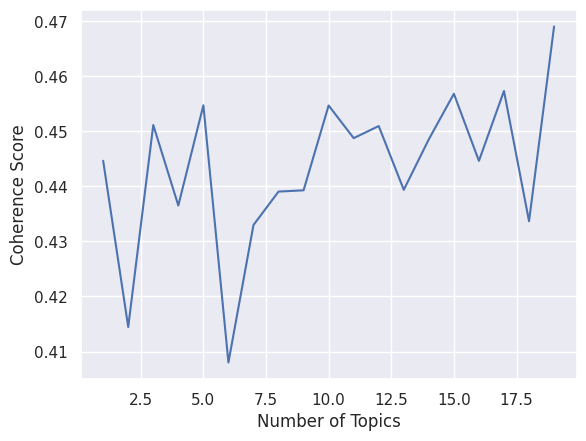

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df_vader_op2['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=10, workers = 4, passes=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.077*"chatgpt" + 0.072*"rt" + 0.047*"news" + 0.042*"ve" + 0.039*"openai" + 0.038*"data" + 0.034*"child" + 0.034*"pay" + 0.029*"personal" + 0.029*"st"'),
 (1,
  '0.141*"flaw" + 0.141*"w" + 0.135*"fatal" + 0.111*"rt" + 0.048*"power" + 0.048*"ai" + 0.034*"code" + 0.034*"t" + 0.034*"world" + 0.034*"llm"'),
 (2,
  '0.124*"chatgpt" + 0.103*"italy" + 0.102*"ban" + 0.089*"openai" + 0.060*"lift" + 0.038*"danger" + 0.032*"effort" + 0.029*"demand" + 0.029*"warn" + 0.029*"elon"'),
 (3,
  '0.084*"chatgpt" + 0.084*"eu" + 0.083*"ban" + 0.082*"act" + 0.081*"ai" + 0.081*"privacy" + 0.080*"openai" + 0.075*"lift" + 0.075*"regulation" + 0.075*"move"'),
 (4,
  '0.160*"openai" + 0.136*"end" + 0.110*"researcher" + 0.106*"ai" + 0.104*"catastrophe" + 0.104*"chance" + 0.046*"fear" + 0.033*"rt" + 0.020*"know" + 0.020*"meet"'),
 (5,
  '0.295*"gpt" + 0.055*"rt" + 0.050*"bad" + 0.050*"people" + 0.027*"dead" + 0.027*"think" + 0.024*"need" + 0.024*"work" + 0.024*"stupid" + 0.024*"feel"'),
 (6,
  '0.330*"ai" 

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(lda_display)

NameError: ignored

In [ ]:
df_vader_op2['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df_vader_op2['cleaned_text']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-142-3d1e20666669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader_op2['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df_vader_op2['cleaned_text']))]


In [ ]:
df_vader_op2.topic.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    427
3     47
7     18
2      8
Name: topic, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

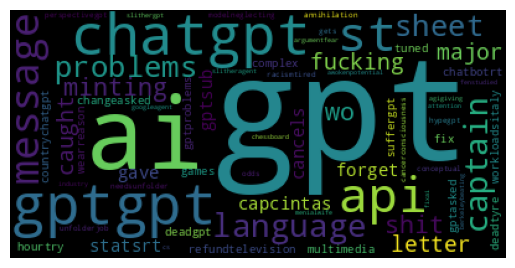

In [ ]:
str = ''
for i in keywords_list:
  str+=i[0]
wordcloud = WordCloud().generate(str)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()